In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
data_path = 'geosentinel_dataset.csv'
df = pd.read_csv(data_path)

In [22]:
df.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,PSE62716,01-Nov-24,2024,1,Strategic developments,Strategic developments,Looting/property destruction,Settlers (Israel),NaN,Political militia,...,Shi'b Al Batim,31.3942,35.1365,1,PLO Negotiations Affairs Department,Other,"Land seizure: On 1 November 2024, Israeli sett...",0,NaN,1730758098
1,YEM93235,01-Nov-24,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Yemen),Government of Yemen (2017-) Houthi,Protesters,...,Dawran ad Daydah,14.7393,44.2066,2,Yemen News Agency (SABA) - Houthi,National,"On 1 November 2024, protesters held a large Ho...",0,crowd size=large,1730758099
2,YEM93304,01-Nov-24,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Yemen),Government of Yemen (2017-) Houthi,Protesters,...,Uzlat Al Aqibah,13.8786,43.7357,2,Yemen News Agency (SABA) - Houthi,National,"On 1 November 2024, protesters held a large Ho...",0,crowd size=large,1730758099
3,YEM93309,01-Nov-24,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Yemen),Government of Yemen (2017-) Houthi,Protesters,...,Al Junayd,14.0842,44.0575,1,Yemen News Agency (SABA) - Houthi,National,"On 1 November 2024, protesters held a large Ho...",0,crowd size=large,1730758099
4,YEM93315,01-Nov-24,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Yemen),Government of Yemen (2017-) Houthi,Protesters,...,Uzlat Al Ajum,14.0936,43.9495,2,Yemen News Agency (SABA) - Houthi,National,"On 1 November 2024, protesters held a large Ho...",0,crowd size=large,1730758099


In [23]:
X = df.drop(columns=['country'])  
y = df['country']

In [24]:
categorical_columns = X.select_dtypes(include=['object']).columns

In [25]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Convert to string if not already
    label_encoders[col] = le

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
X_reshaped = np.expand_dims(X_scaled, axis=2)

In [30]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y

SyntaxError: incomplete input (2169926301.py, line 2)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [32]:
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')  # Output layer for multi-class classification
])

C:\Users\adith\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=20, batch_size=32)

Epoch 1/20
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5245 - loss: 2.1206 - val_accuracy: 0.9165 - val_loss: 0.3776
Epoch 2/20
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8363 - loss: 0.6131 - val_accuracy: 0.9473 - val_loss: 0.2242
Epoch 3/20
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8748 - loss: 0.4343 - val_accuracy: 0.9596 - val_loss: 0.1634
Epoch 4/20
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8950 - loss: 0.3528 - val_accuracy: 0.9668 - val_loss: 0.1364
Epoch 5/20
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9077 - loss: 0.3103 - val_accuracy: 0.9700 - val_loss: 0.1228
Epoch 6/20
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9150 - loss: 0.2742 - val_accuracy: 0.9747 - val_loss: 0.1058
Epoch 7/20
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9209 - loss: 0.2559 - val_accuracy: 0.9775 - val_loss: 0.0969
Epoch 8/20
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9269 - loss: 0

In [35]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_encoded, axis=1)

544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [36]:
accuracy = accuracy_score(y_true_labels, y_pred_labels)

In [37]:
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

C:\Users\adith\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9871875897730538
Precision: 0.9860905624927891
Recall: 0.9871875897730538
F1 Score: 0.9855892167164269


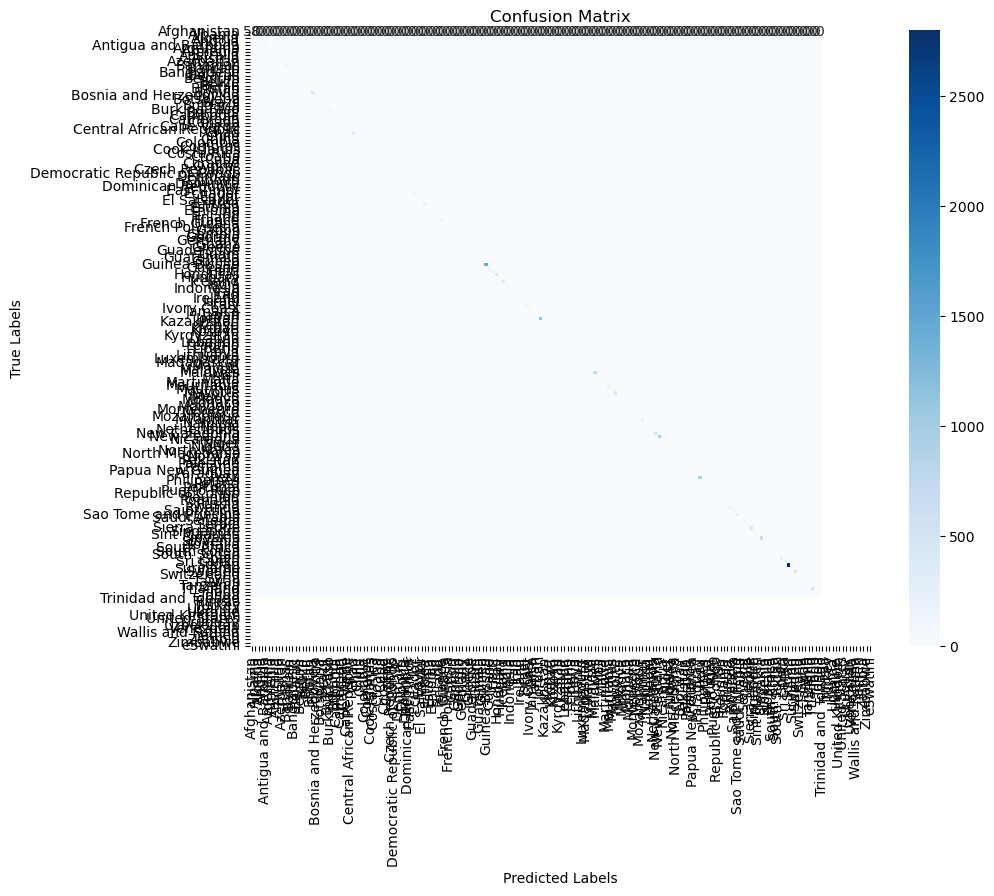

In [39]:
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [41]:
unique_labels = np.unique(y_true_labels)
print("Classification Report:\n", classification_report(y_true_labels, y_pred_labels, labels=unique_labels, target_names=[label_encoder.classes_[i] for i in unique_labels]))

Classification Report:
                               precision    recall  f1-score   support

                 Afghanistan       0.91      1.00      0.95        58
                     Albania       0.00      0.00      0.00         5
                     Algeria       1.00      0.88      0.93         8
                      Angola       1.00      1.00      1.00         1
                   Argentina       0.96      0.99      0.97        95
                     Armenia       1.00      1.00      1.00        14
                   Australia       1.00      1.00      1.00        41
                     Austria       0.93      1.00      0.97        14
                  Azerbaijan       1.00      0.57      0.73         7
                     Bahrain       1.00      1.00      1.00        29
                  Bangladesh       0.99      1.00      1.00       155
                     Belarus       1.00      1.00      1.00        16
                     Belgium       1.00      1.00      1.00      

C:\Users\adith\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adith\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adith\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
model.save("geosentinel_cnn_model.h5")